(1797, 64)
<class 'numpy.ndarray'>
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
0


<Figure size 432x288 with 0 Axes>

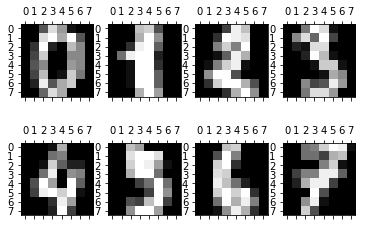

In [1]:
from sklearn.datasets import load_digits
%matplotlib inline

digits = load_digits()
print(digits.data.shape)
print(type(digits.data))
print(digits.data[0])
print(digits.target[0])

import matplotlib.pyplot as plt 

plt.gray() 

fig = plt.figure()
ax = {}
image_num = [0, 100, 200, 300, 1000, 1100, 1200, 1300]

for i in range(8):
    ax[i] = fig.add_subplot(2,4,i+1)
    ax[i].matshow(digits.images[i])

plt.show()

In [2]:
import pandas as pd
df = pd.DataFrame(digits.data)

In [3]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(df, digits.target, random_state=5, shuffle=True)

def train_test(n): 
    knn = KNeighborsClassifier(n_neighbors=n,algorithm='brute')    
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)    
    return predictions

n_list = [7, 5, 4, 3]
mse = {}
for i in n_list:
    y_pred = train_test(i)
    mse[i] = mean_squared_error(y_pred, y_test)
print(mse)

n_min_mse = min(mse, key=mse.get)
comp_dict = {'predicted': train_test(n_min_mse), 'test_target': y_test}
comparison = pd.DataFrame(data=comp_dict)
print(comparison.head(10))

{7: 0.41555555555555557, 5: 0.41555555555555557, 4: 0.39555555555555555, 3: 0.30444444444444446}
   predicted  test_target
0          5            5
1          2            2
2          5            5
3          5            5
4          5            5
5          3            3
6          2            2
7          2            2
8          3            3
9          5            5


{7: 0.6082572838042745, 5: 0.6231472765417181, 4: 0.5924261096767243, 3: 0.5633936502228671}


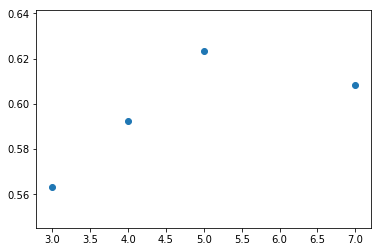

In [4]:
from sklearn.model_selection import cross_val_score, KFold

def k_fold_validation(n):
    kf = KFold(4, True, 1)
    knn = KNeighborsClassifier(n_neighbors=n,algorithm='brute')
    mses = cross_val_score(knn, df, digits.target, scoring='neg_mean_squared_error', cv=kf)
    avg_rmse = np.mean(np.sqrt(np.absolute(mses)))
    return avg_rmse

n_list = [7, 5, 4, 3]
avg_rmse_dict = {}
for i in n_list:
    avg_rmse_dict[i] = k_fold_validation(i)
    
print(avg_rmse_dict)

plt.scatter(avg_rmse_dict.keys(), avg_rmse_dict.values())

{8: 1.1861606129852404, 16: 0.8190651361042227, 32: 0.8352187457029545, 64: 0.7192476262356908, 128: 0.7842935057140976, 256: 0.6820711953666434}


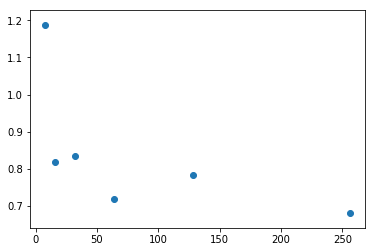

In [5]:
from sklearn.neural_network import MLPClassifier

def k_fold_validation_neural(n):
    kf = KFold(4, True, 1)
    clf = MLPClassifier(hidden_layer_sizes=(n), max_iter=50000, random_state=10)
    mses = cross_val_score(clf, df, digits.target, scoring='neg_mean_squared_error', cv=kf)
    avg_rmse = np.mean(np.sqrt(np.absolute(mses)))
    return avg_rmse

n_list = [8, 16, 32, 64, 128, 256]
avg_rmse_dict = {}
for i in n_list:
    avg_rmse_dict[i] = k_fold_validation_neural(i)
    
print(avg_rmse_dict)

plt.scatter(avg_rmse_dict.keys(), avg_rmse_dict.values())

{8: (0.011878247958426132, 0.5), 16: (0.0, 0.7533333333333333), 32: (0.0, 0.32222222222222224), 64: (0.0, 0.23333333333333334), 128: (0.0, 0.45111111111111113), 256: (0.0, 0.2911111111111111)}


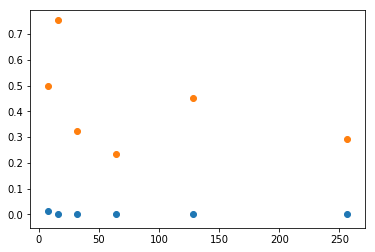

In [6]:
def train_test_neural(n): 
    clf = MLPClassifier(hidden_layer_sizes=(n), max_iter=50000, random_state=10)  
    X_train, X_test, y_train, y_test = train_test_split(df, digits.target, random_state=5, shuffle=True)
    clf.fit(X_train, y_train)
    predictions_train = clf.predict(X_train)
    predictions_test = clf.predict(X_test)
    return predictions_train, predictions_test

n_list = [8, 16, 32, 64, 128, 256]
mse = {}
train_mse ={}
test_mse = {}

for i in n_list:
    pred_train = train_test_neural(i)[0]
    pred_test = train_test_neural(i)[1]
    train_mse[i] = mean_squared_error(pred_train, y_train) 
    test_mse[i] = mean_squared_error(pred_test, y_test)
    mse[i] = (mean_squared_error(pred_train, y_train), mean_squared_error(pred_test, y_test))

print(mse)

plt.scatter(mse.keys(), train_mse.values())
plt.scatter(mse.keys(), test_mse.values())
plt.show()

In [13]:
n = (64, 64)
pred_train = train_test_neural(n)[0]
pred_test = train_test_neural(n)[1]
train_mse = mean_squared_error(pred_train, y_train) 
test_mse = mean_squared_error(pred_test, y_test)

print(train_mse, test_mse)

0.0 0.4111111111111111


In [14]:
n = (10, 10, 10)
pred_train = train_test_neural(n)[0]
pred_test = train_test_neural(n)[1]
train_mse = mean_squared_error(pred_train, y_train) 
test_mse = mean_squared_error(pred_test, y_test)

print(train_mse, test_mse)

0.0 0.7088888888888889


In [15]:
n = (64, 64, 64)
pred_train = train_test_neural(n)[0]
pred_test = train_test_neural(n)[1]
train_mse = mean_squared_error(pred_train, y_train) 
test_mse = mean_squared_error(pred_test, y_test)

print(train_mse, test_mse)

0.0 0.3422222222222222


In [16]:
n = (128, 128, 128)
pred_train = train_test_neural(n)[0]
pred_test = train_test_neural(n)[1]
train_mse = mean_squared_error(pred_train, y_train) 
test_mse = mean_squared_error(pred_test, y_test)

print(train_mse, test_mse)

0.0 0.3022222222222222
